#### Polinom illesztése mért adatokra, integrálás

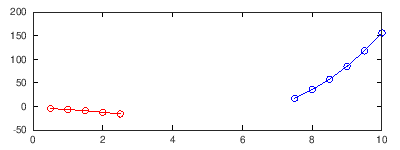

In [2]:
clear
# t vs y(t), mérés megszakadt, de ez jól közelíthető 3-adfokú polinommal
#  y idő szerint integrálját számítják
# illesztés, integrálás t szerint, a,b = 0,10;
# vs trapézszabály hiányos adatokra, lineárisan extrapoláció t = 0-ra;

#t = [0.5,1.0,1.5,2.0,2.5,7.5,8.0,8.5,9.0,9.5,10.0];
#y = [-4.5,-6.8,-8.9,-12.5,-15.9,17.0,35.6,57.6,84.9,117.7,155.9];
#size(t),size(y)

data = load("dat");
t = data(:,1)';
y = data(:,2)';

figure(1, 'position',[0,0,400,150]);
plot(t(1:5),y(1:5),'r-o',"linewidth",3,t(6:end),y(6:end),'b-o',"linewidth",3)

c =

   0.50491  -3.56743   1.19608  -4.53512



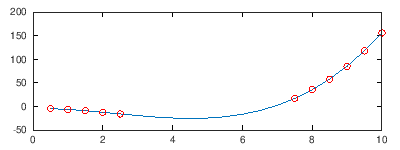

In [3]:
c = polyfit(t,y,3) # harmadfokú polinom illesztése

for i=1:20 x(i)=0.5*i; endfor; # 0.5...10
yfit=polyval(c,x); # illesztett polinom helyettesítési értékei

figure(1, 'position',[0,0,400,150]);
plot(x,yfit,"linewidth",3,t(6:end),y(6:end),'ro',t(1:5),y(1:5),'ro')

In [6]:
cint = polyint(c)
polyval(cint,10)-polyval(cint,0)
trapz(t,y)

cint =

   0.12623  -1.18914   0.59804  -4.53512   0.00000

ans =  87.573
ans =  174.68


lineáris extrapoláció: $\frac{y-y_{1}}{x-x_{1}}=\frac{y_{2}-y_{1}}{x_{2}-x_{1}}$

ans = -2.2000
ans = -2.2000
ans =  173


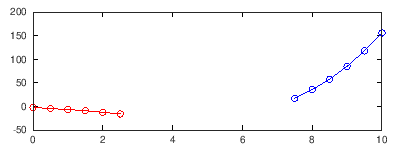

In [8]:
#lineáris extrapoláció a fenti képletettel
#vagy
linfit=polyfit(t(1:2),y(1:2),1);
polyval(linfit,0)
#vagy
interp1(t,y,0,"linear","extrap")

#extrapolált értéket az y elejébe illesztjük, illetve a 0-t a t elejébe
tex=zeros(1,12);
tex(2:end)=t(1:end);

yex=zeros(1,12);
yex(2:end)=y(1:end);
yex(1)=-2.2;

trapz(tex,yex) # nem sokat javul a trapézszabállyal számított integrál

figure(1, 'position',[0,0,400,150]);
plot(tex(1:6),yex(1:6),'r-o',"linewidth",3,tex(7:end),yex(7:end),'b-o',"linewidth",3)

### Fourier transzformáció
**lényeg** az információt átalakítjuk más változó terébe Fourier transzformációval: $F[s]\rightarrow \left[\frac{1} {s}\right]$ (időtérből frekvenciatérbe)<br>

---
**Fourier sorfejtés**:

---
tetszőleges **periodikus** függvényt felbontunk cos és sin függvények súlyozott "diszkrét" összegére<br>
súlyok az $a_0$, $a_n$, $b_n$ sorfejtési együtthatók


$f(t) = a_{0}+\sum\limits_{n=1}^{\infty}a_{n}\cos\left(\frac{2\pi nt}{T}\right)+\sum\limits_{n=1}^{\infty}b_{n}\sin\left(\frac{2\pi nt}{T}\right)$<br>

$\displaystyle a_{n}=\frac{2}{T}\int\limits_{t_{0}}^{t_{0}+T}f(t)\cos\left(\frac{2\pi nt}{T}\right)\mathrm{d}t$, egy $T$ periódusra integrálunk<br>

Euler-képlet: $\mathrm{e}^{\mathrm{i}x}=\underbrace{\cos x}_{\text{real}(\mathrm{e}^{\mathrm{i}x})}+\underbrace{\mathrm{i}\sin x}_{{\text{imag}(\mathrm{e}^{\mathrm{i}x})}}\rightarrow$ $\sin x=\frac{\mathrm{e}^{\mathrm{i}x}-\mathrm{e}^{\mathrm{-i}x}}{2\mathrm{i}}$ és $\cos x=\frac{\mathrm{e}^{\mathrm{i}x}+\mathrm{e}^{\mathrm{-i}x}}{2}$

Euler képlet figyelembevételével $f(t)$ komplex exponenciálisok összegeként is felírható: $f(t)=\sum\limits_{\infty}^{\infty}c_{n}\mathrm{e}^{\mathrm{i}\omega t}$

---
**Fourier transzformáció**<br>

---
ha a függvény folytonos, de **nem periodikus** ("1 periódusa van $-\infty$ és $\infty$ között"), akkor az $f(t)$ függvényt Fourier transzformációval bontjuk fel, ami átvisz a frekvenciatérbe és itt végezzük a függvény (jel) analízisét

$F(\nu)=\int\limits_{\infty}^{\infty}f(t)\,\mathrm{e}^{\mathrm{-i}2\pi\nu t}\mathrm{d}t$, vessük össze pl. az $a_{n}$ sorfejtési együtthatóval, ahol 1 periódusra ($T$) integráltunk, itt most egyetlen periódusunk van $(-\infty,\infty)$ között, tekinthetünk a transzformációra, mint a sorfejtés folytonos határtértékére olyan függvény esetében, melynek periódusa végtelen

**inverz F trafóval** vissztérünk a frekvenciatérből az időtérbe: $f(t)=\int\limits_{\infty}^{\infty}F(\nu)\,\mathrm{e}^{\mathrm{-i}2\pi\nu t}\mathrm{d}\nu$

$F(\nu)$ és $f(t)$ információtartalma azonos (infó nem veszik el), csak más a reprezentáció

---

**DFT** diszkrét Fourier transzformáció

---

$f(t)$-ből $\Delta t$ egyenlő időközönként (gyakorisággal) mintát veszünk $N$-szer<br>
$\Delta t$ időlépés a frekvenciatérben egységnyi frekvencialépésnek $\displaystyle\Delta\nu=\frac{1}{N\Delta t}$ felel meg

jelölés: Fourier transzformált a $k$-adik frekvencialépésnél (adott frekvenciánál): $F(\nu)=F(k\Delta\nu)=F_{k}$

$\displaystyle F_{k}\equiv\frac{1}{N}\sum\limits_{n=0}^{N-1}f_{n}\mathrm{e}^{\frac{-\mathrm{i}2\pi n k}{N}}$

**inverz DFT** $f(t)=F(n\Delta t)=f_{n},\quad\quad\quad\quad\quad\quad$ $\displaystyle f_{n}\equiv\sum\limits_{k=0}^{N-1}F_{k}\mathrm{e}^{\frac{\mathrm{i}2\pi n k}{N}}$


DFT gyorsan számítható az FFT (fast fourier transform, Cooley & Tukey) algoritmussal, ha $N=2^{k}$ adatunk van. Ha kevesebb az adat, akkor kiegészítjük ennyire 0-kal, ez nem változtat az eredményen.

$\displaystyle F(\nu)[\sin(2\pi \nu t)]=\frac{1}{2}\mathrm{i}[\delta (\nu+f) - \delta(\nu-f)] \rightarrow 0$, kivéve, ahol $f=\pm \nu$

$\displaystyle F(\nu)[\cos(2\pi \nu t)]=\frac{1}{2}[\delta (\nu+f) - \delta(\nu-f)] \rightarrow 0$, kivéve, ahol $f=\pm \nu$

felhasználás: villamosmérnökség, akusztika, mp3, optika, jelfeldolgozás, képfeldolgozás, kvantummechanika, ökonometria, spektroszkópia (NMR, forgási(MW), rezgési(IR))

<img src="nmr.png" alt="NMR" width="500"/>


$x(t) = A\sin(\omega t + \phi) = A\sin(2\pi \nu t+\phi)$<br>
$A$ amplitúdó<br>
$\omega=2\pi \nu$, körfrekvencia, $[\omega]=$rad$\cdot s^{-1}$<br> 
$[\nu]=s^{-1}=\mathrm{Hz}$, frekvencia<br> 
$[\phi]=$rad, fázis<br> 

$f(t) = A\sin(2\pi \nu t+\phi) = \sin(2\pi 15 t)$<br>




#### 1 sin transzformációja

In [1]:
clear
n = 2**8  # 256-szor veszek mintát a szinuszhullámból
#n = 2**13
dt = 1/n # mintavétel időlépése, minden dt időpillanatban kiszámolom a szinusz hullám értékét

n =  256
dt =  0.0039062


freq =  15


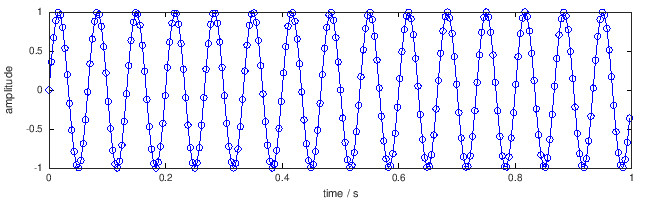

In [2]:
# 15 Hz-es sin hullám
#freq = 4
#freq = 440

freq = 15
for i=1:n t(i)=(i-1)*dt; endfor;
f=sin(freq*t*2*pi);

# számoljuk le a maximális kitéréseket az ábrán, 1 másodperc alatt 15 periódusa megy végbe a hullámnak

figure(1, 'position',[0,0,650,200]);
plot(t,f,'o-b'),xlabel("time / s");ylabel("amplitude")

#sound(f)

In [4]:
dnu=1/(n*dt) #frekvencialépés
for i=1:n nu(i)=(i-1)*dnu; endfor;
nu(1),nu(256)

dnu =  1
ans = 0
ans =  255


In [5]:
size(f)
#fft fast fourier transformation
F = fft(f); #jelölés: F Fourier transzformált
F'(1:20) # nézzünk bele a Fourier transzformáltba

Fr=real(F); # F valós része
Fi=imag(F); # F imaginárius része
Fa=abs(F);  # F abszolút értéke 


#sok nulla, ott van a szinuszunk, ahol a képzetes rész nem zérus (két csúcs ellentétes előjelű amplitúdóval)
idx=find(Fa>10)  #find() megkeresi azon indexeket ahol Fa > 10, Fa-ban minden csúcs azonos előjelű lesz

F(idx)
nu(idx) # nu(16) = 15 és nu(242) = 241 frekvenciáknál van a 15 Hz-es szinusz függvény amit transzformáltunk 

ans =

     1   256

ans =

    -0.00000 -   0.00000i
    -0.00000 +   0.00000i
     0.00000 -   0.00000i
     0.00000 -   0.00000i
    -0.00000 -   0.00000i
    -0.00000 +   0.00000i
     0.00000 -   0.00000i
    -0.00000 -   0.00000i
     0.00000 -   0.00000i
    -0.00000 +   0.00000i
    -0.00000 -   0.00000i
    -0.00000 +   0.00000i
     0.00000 -   0.00000i
     0.00000 -   0.00000i
    -0.00000 -   0.00000i
    -0.00000 + 128.00000i
     0.00000 +   0.00000i
    -0.00000 +   0.00000i
     0.00000 +   0.00000i
    -0.00000 +   0.00000i

idx =

    16   242

ans =

    -0.00 - 128.00i    -0.00 + 128.00i

ans =

    15   241



SPEKTRUM


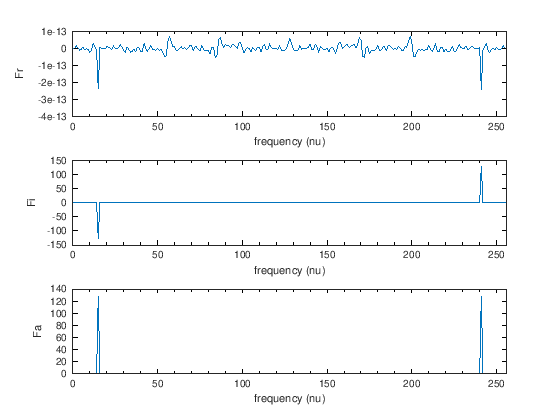

In [6]:
disp("SPEKTRUM")
subplot (3, 1, 1)
plot (nu,Fr);xlim ([0, 256]);ylabel ("Fr");xlabel ("frequency (nu)");set (gca, "xminortick", "on")
subplot (3, 1, 2)
plot (nu,Fi);xlim ([0, 256]);ylabel ("Fi");xlabel ("frequency (nu)");set (gca, "xminortick", "on")
subplot (3, 1, 3)
plot (nu,Fa);xlim ([0, 256]);ylabel ("Fa");xlabel ("frequency (nu)");set (gca, "xminortick", "on")

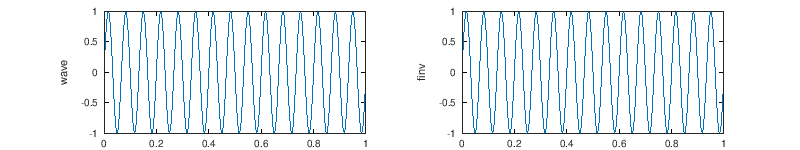

In [15]:
# ifft inverse fft
finv=ifft(F);

figure(1, 'position',[0,0,800,150]);
subplot (1, 2, 1)
plot (t,f);ylabel ("wave");xlabel ("t")
subplot (1, 2, 2)
plot (t,finv);ylabel ("finv");xlabel ("t")

#### 3 sin keveréke, egyik frekvencia kivágása (frekvenciaszűrés)

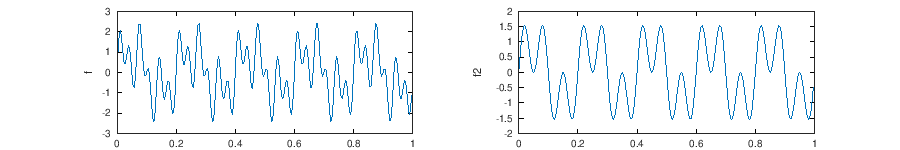

In [20]:
f = sin(t*15*2*pi)+sin(t*5*2*pi)+sin(t*30*2*pi); 
f2 = sin(t*15*2*pi)+sin(t*5*2*pi);

figure(1, 'position',[0,0,900,150]);
subplot (1, 2, 1)
plot (t,f);ylabel ("f");xlabel ("t")
subplot (1, 2, 2)
plot (t,f2);ylabel ("f2");xlabel ("t")

idx =

     6    16    31   227   242   252

ans =

    -0.00 + 128.00i
    -0.00 + 128.00i
    -0.00 + 128.00i
    -0.00 - 128.00i
    -0.00 - 128.00i
    -0.00 - 128.00i

ans =

     5    15    30   226   241   251



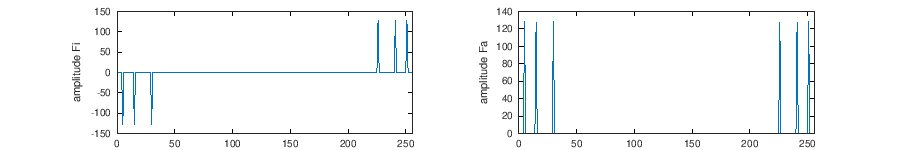

In [23]:
F=fft(f);
Fa=abs(F);

idx=find(Fa>10)
F(idx)'
nu(idx)

figure(1, 'position',[0,0,900,150]);
subplot (1, 2, 1)
plot (nu,imag(F));xlim ([0, 256]);ylabel ("amplitude Fi");xlabel ("nu")
subplot (1, 2, 2)
plot (nu,abs(F));xlim ([0, 256]);ylabel ("amplitude Fa");xlabel ("nu")

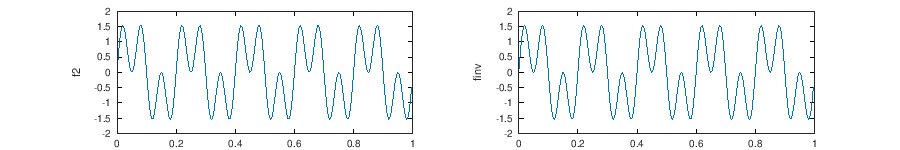

In [24]:
# szűrés 
F(31) = 0+0i; 
F(227) = 0+0i; 

finv=ifft(F); # szűrtet idő térbe visszatranszformáljuk, összevetjük f2-vel, megegyeznek

figure(1, 'position',[0,0,900,150]);
subplot (1, 2, 1)
plot (t,f2);ylabel ("f2");xlabel ("t")
subplot (1, 2, 2)
plot (t,finv);ylabel ("finv");xlabel ("t")

#### 3 sin keveréke + zaj, zaj szűrése (amplitúdószűrés)

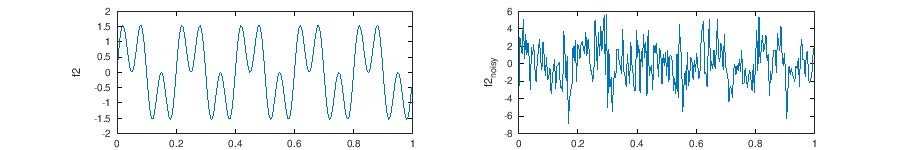

In [25]:
fz = f2+2.0*randn(1,256);

figure(1, 'position',[0,0,900,150]);
subplot (1, 2, 1)
plot (t,f2);ylabel ("f2");xlabel ("t")
subplot (1, 2, 2)
plot (t,fz);ylabel ("f2_{noisy}");xlabel ("t")

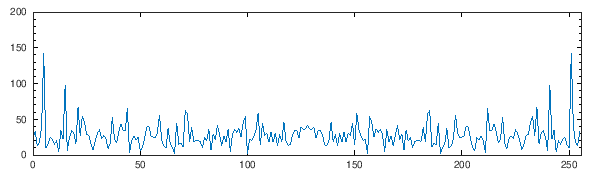

In [59]:
F=fft(fz);
Fa = abs(F);

figure(1, 'position',[0,0,600,175])
plot(nu,Fa) # 80-as amplitúdó felett négy csúcs van
xlim ([0, 256]);set (gca, "yminortick", "on")

# szűrünk mindent 80-as amplitúdó alatt
for i=1:n if(Fa(i)<80) F(i)=0+0i; endif; endfor; 
 
finv=ifft(F); # szűrt inverz trafó időtérbe

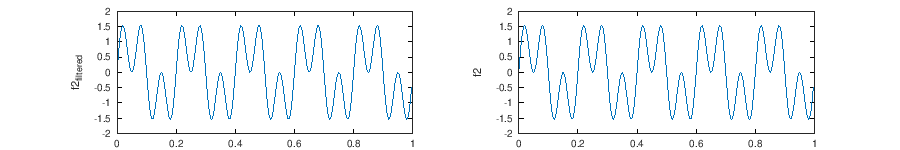

In [28]:
figure(2, 'position',[0,0,900,150])
subplot (1, 2, 1)
plot (t,finv);ylabel ("f2_{filtered}");xlabel ("t")
subplot (1, 2, 2)
plot (t,f2);ylabel ("f2");xlabel ("t")

#### Gauss függvény transzformálása

$\displaystyle g=\frac{1}{\sqrt{2\pi s^{2}}}\mathrm{e}^{\frac{-x^{2}}{2s^{2}}}$

gauss görbe fourier transzformáltja gauss görbe<br>
scale theorem: minél rövidebb a pulzus (s = 1,2,3), annál szélesebb a spektrum <br>

s =  1
s =  3
s =  5


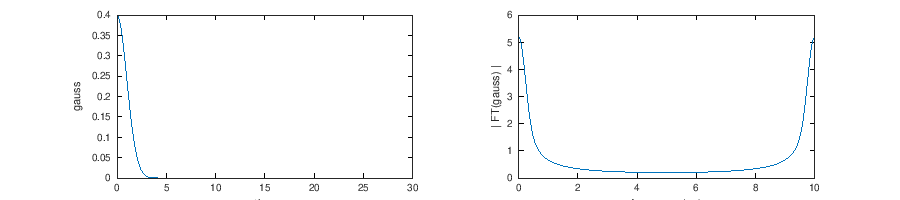

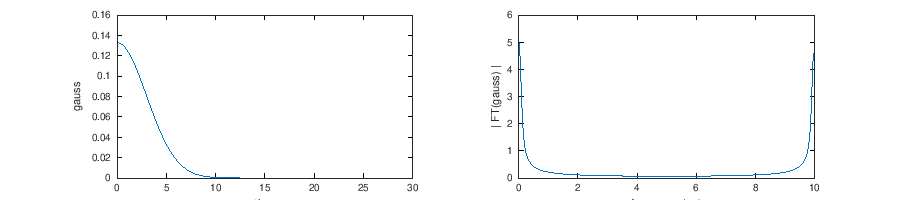

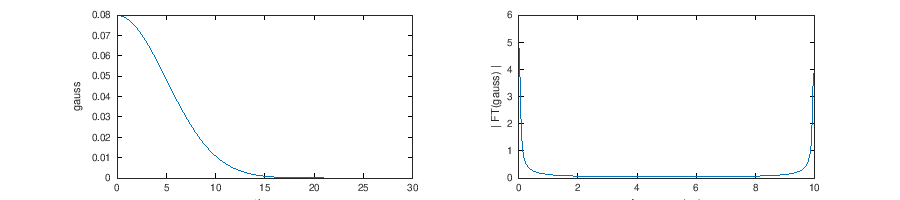

In [32]:
dx=0.1; 
for i=1:n x(i)=(i-1)*dx; endfor; 
s=1 
for i=1:n g(i)=1/sqrt(2*pi()*s*s)*exp(-x(i)*x(i)/2/s/s); endfor; 
dnu=1/dx/n; 
for i=1:n nu(i)=(i-1)*dnu; endfor; 
G=fft(g); 
Ga=abs(G); 

figure(1, 'position',[0,0,900,200])
subplot (1, 2, 1)
plot (x,g);ylabel ("gauss");xlabel ( "time" );
subplot (1, 2, 2)
plot (nu,Ga);ylabel ("| FT(gauss) |");xlabel ("frequency (nu)")


dx=0.1; 
for i=1:n x(i)=(i-1)*dx; endfor; 
s=3
for i=1:n g(i)=1/sqrt(2*pi()*s*s)*exp(-x(i)*x(i)/2/s/s); endfor; 
dnu=1/dx/n; 
for i=1:n nu(i)=(i-1)*dnu; endfor; 
G=fft(g); 
Ga=abs(G);

figure(2, 'position',[0,0,900,200])
subplot (1, 2, 1)
plot (x,g);ylabel ("gauss");xlabel ( "time" );
subplot (1, 2, 2)
plot (nu,Ga);ylabel ("| FT(gauss) |");xlabel ("frequency (nu)")



dx=0.1; 
for i=1:n x(i)=(i-1)*dx; endfor; 
s=5
for i=1:n g(i)=1/sqrt(2*pi()*s*s)*exp(-x(i)*x(i)/2/s/s); endfor; 
dnu=1/dx/n; 
for i=1:n nu(i)=(i-1)*dnu; endfor; 
G=fft(g); 
Ga=abs(G);

figure(3, 'position',[0,0,900,200])
subplot (1, 2, 1)
plot (x,g);ylabel ("gauss");xlabel ( "time" );
subplot (1, 2, 2)
plot (nu,Ga);ylabel ("| FT(gauss) |");xlabel ("frequency (nu)")

b) $x$ standard normális eloszlású: $f_{x}=\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{x^{2}}{2}}$<br> 
$y = x^{2}\rightarrow$ $x=\sqrt{y}\rightarrow\frac{\mathrm{d}x}{\mathrm{d}y}=\frac{1}{2\sqrt{y}}$ <br>

$\displaystyle f_{y}=f_{x}\circ x(Y)\left|\frac{\mathrm{d}x}{\mathrm{d}y}\right|=\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{y}{2}}\;\frac{1}{2\sqrt{y}}$<br>

abszolútérték $\mathrm{d}x/\mathrm{d}y$-nál szükséges mert az eloszlásfüggvény $[0,1]$ között értelmezett

ans =  0.46011
ans =  0.92021
ans =  0.74313
ans =  0.94313


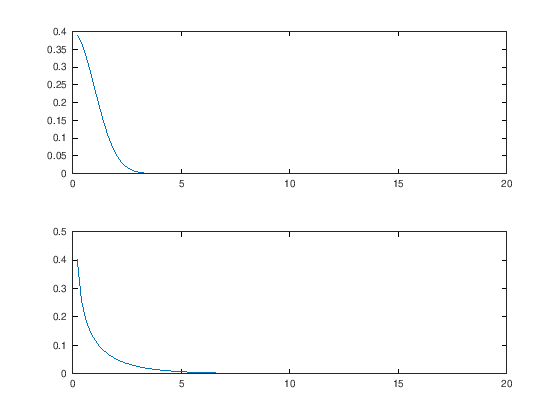

In [9]:
clear

for i=1:100 x(i)=0.2*(i); endfor; #0.2...20
for i=1:100 fx(i)=1/sqrt(2*pi)*exp(-x(i)*x(i)/2); endfor;
#fx = 1/sqrt(2*pi)*exp(-x .^ 2 / 2);

for i=1:100 y(i)=0.2*(i); endfor; #0.2...20
for i=1:100 fy(i)=1/sqrt(2*pi)*exp(-y(i)/2)*(1/2/sqrt(y(i))); endfor;
#fy = 1/sqrt(2*pi)*exp(-y / 2) .* (1./(2*sqrt(y)));

sum(fx)*0.2 # fél gauss-t integráltunk, szükséges 2-vel szorozni
sum(fx)*0.2*2

# emiatt fy téglányösszeget is szorozzuk 2-vel 
sum(fy)*0.2*2 # miért kapunk 0.74313-t? 
sum(fy)*0.2*2+0.2 # hozzáadunk 0.2 (téglányösszegből adódó pontatlanság)

subplot (2, 1, 1)
plot (x,fx)
subplot (2, 1, 2)
plot (y,fy)